In [84]:
# generate random noise numpy
import numpy as np

In [85]:
noise_level = 0.5
random_noise = np.random.rand(10, 1, 184) * noise_level
# random_noise = np.random.normal(loc=0, scale=noise_level, size=(10, 1, 184))

In [86]:
random_noise.shape

(10, 1, 184)

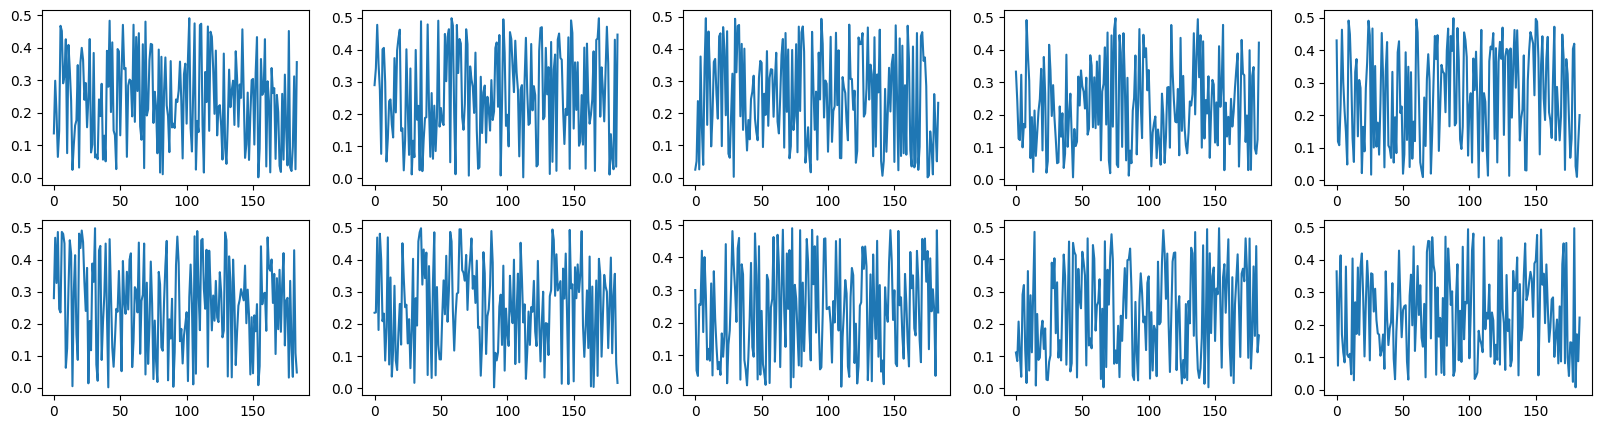

In [87]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20,5))
for i in range(2):
    for j in range(5):
        axs[i, j].plot(random_noise[i*5+j][0][:])

In [88]:
# Set the desired noise levels
num_signals, signal_length = 10, 184
clean_ecg_signals = np.random.rand(num_signals, signal_length) 

thermal_noise_level = 0.1
electrode_noise_level = 0.2
motion_artifact_level = 0.3
emg_noise_level = 0.4

# Generate and add thermal noise (white noise)
thermal_noise = np.random.normal(loc=0, scale=thermal_noise_level, size=(num_signals, signal_length))

# Generate and add electrode contact noise (low-frequency drift)
t = np.linspace(0, signal_length, signal_length)
electrode_noise = electrode_noise_level * np.sin(2 * np.pi * 0.05 * t)
electrode_noise = np.tile(electrode_noise, (num_signals, 1))

# Generate and add motion artifacts (random spikes)
num_spikes = 3
spike_positions = np.random.randint(0, signal_length, (num_signals, num_spikes))
motion_artifacts = np.zeros_like(clean_ecg_signals)
for i in range(num_signals):
    for spike_pos in spike_positions[i]:
        motion_artifacts[i, spike_pos:spike_pos + 10] = motion_artifact_level

# Generate and add EMG noise (simulated as high-frequency noise)
emg_noise = np.random.normal(loc=0, scale=emg_noise_level, size=(num_signals, signal_length))
emg_noise = np.diff(emg_noise, n=2, axis=1)  # Differentiate twice to simulate high-frequency noise
emg_noise = np.pad(emg_noise, ((0, 0), (2, 0)), mode='constant')  # Pad to restore the original shape

In [89]:
def display(noise, *args):
    fig, axs = plt.subplots(1, 5, figsize=(20,3))
    for j in range(5):
        axs[j].plot(noise[j][:])
    if args:
        plt.savefig(f'./{args[0]}.pdf', format='pdf')

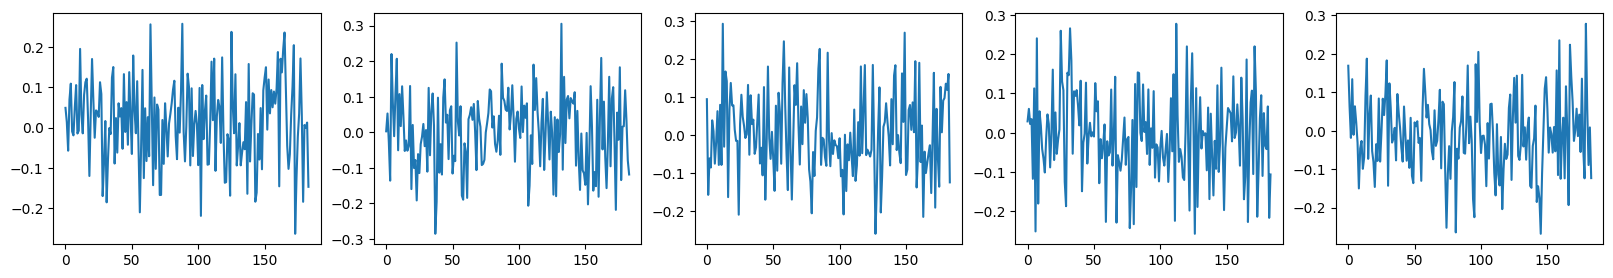

In [90]:
display(thermal_noise, 'thermal_noise')

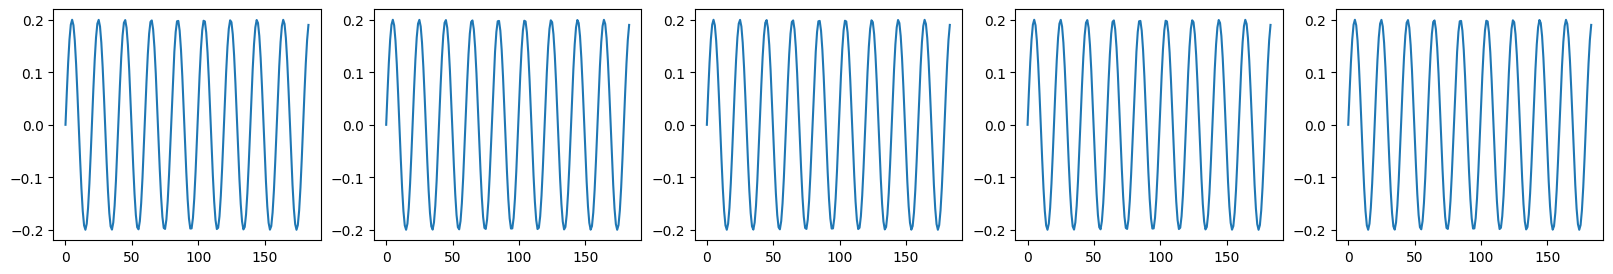

In [91]:
display(electrode_noise, 'electrode_noise')

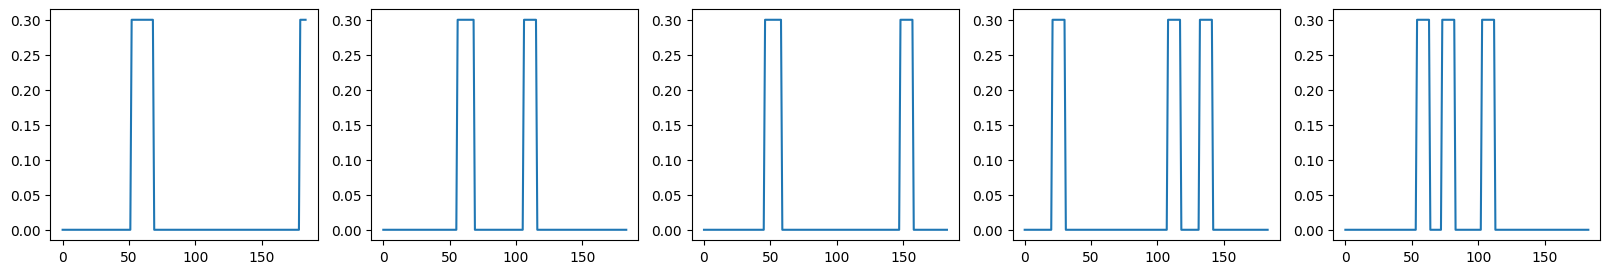

In [92]:
display(motion_artifacts, 'motion_artifacts')

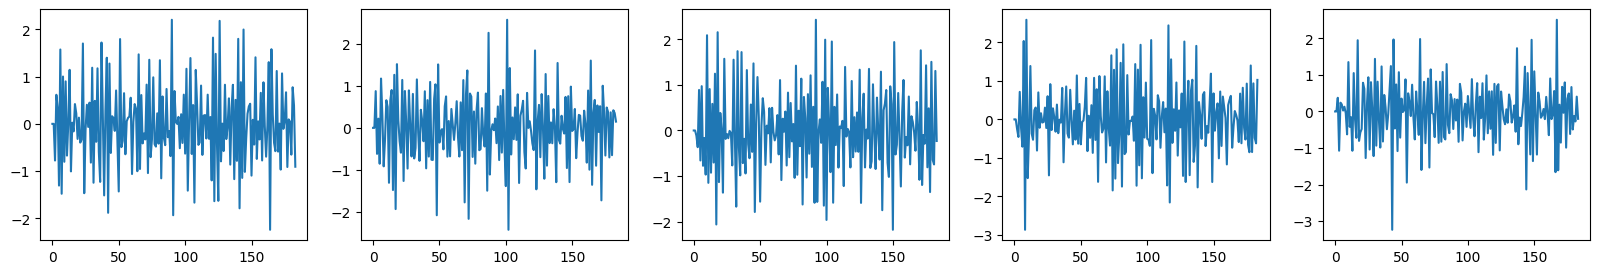

In [93]:
display(emg_noise, "emg_noise")

In [94]:
# change the motion spikes to 1-5 random times and value within the range 0.3-1

num_spikes_per_signal = np.random.randint(1, 6, num_signals)  # Randomly select the number of spikes for each signal
motion_artifacts = np.zeros_like(clean_ecg_signals)
for i in range(num_signals):
    spike_positions = np.random.randint(0, signal_length, num_spikes_per_signal[i])
    spike_amplitudes = np.random.uniform(0.3, 1, num_spikes_per_signal[i])
    for spike_pos, spike_amp in zip(spike_positions, spike_amplitudes):
        motion_artifacts[i, spike_pos:spike_pos + 5] = spike_amp


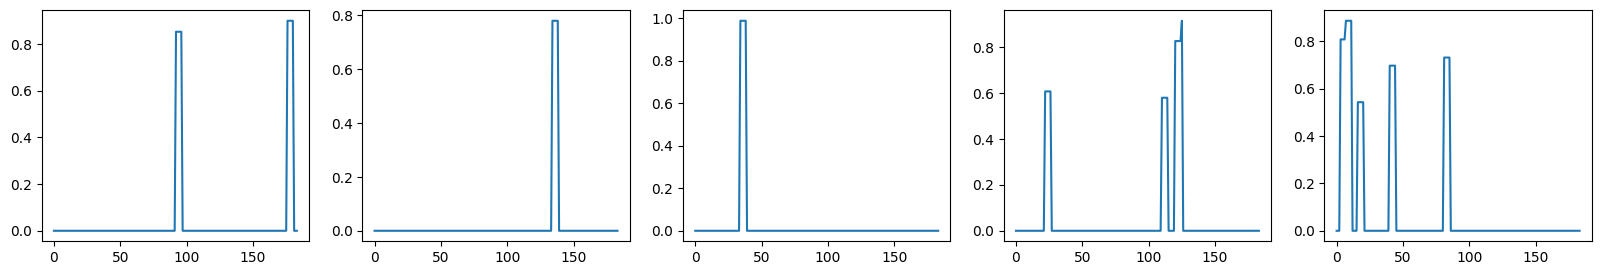

In [95]:
display(motion_artifacts,"motion_artifact")

In [96]:
!kaggle datasets download -d shayanfazeli/heartbeat
import zipfile
with zipfile.ZipFile("./heartbeat.zip", 'r') as zip_ref:
    zip_ref.extractall("./heartbeat")

heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [97]:
# read real data
import pandas as pd
data_pd = pd.read_csv('./heartbeat/mitbih_train.csv', header=None)
print(len(data_pd))

ecg_data = data_pd[data_pd[187] == 4]
ecg_data = ecg_data.iloc[:, :184].values
print(ecg_data.shape)

87554
(6431, 184)


In [98]:
sample_data = ecg_data[:10]

In [99]:
sample_data.shape

(10, 184)

In [100]:
noisy_ecg_signals = sample_data + thermal_noise + motion_artifacts

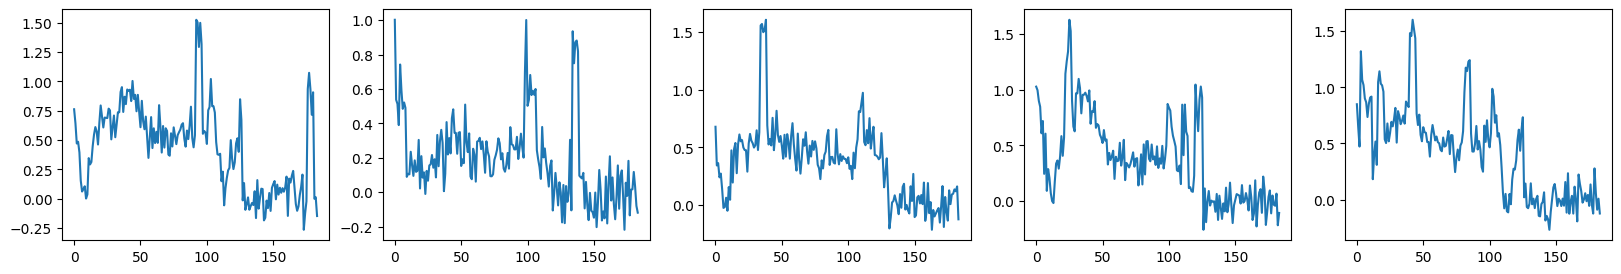

In [101]:
display(noisy_ecg_signals,"noisy_ecg_signals")

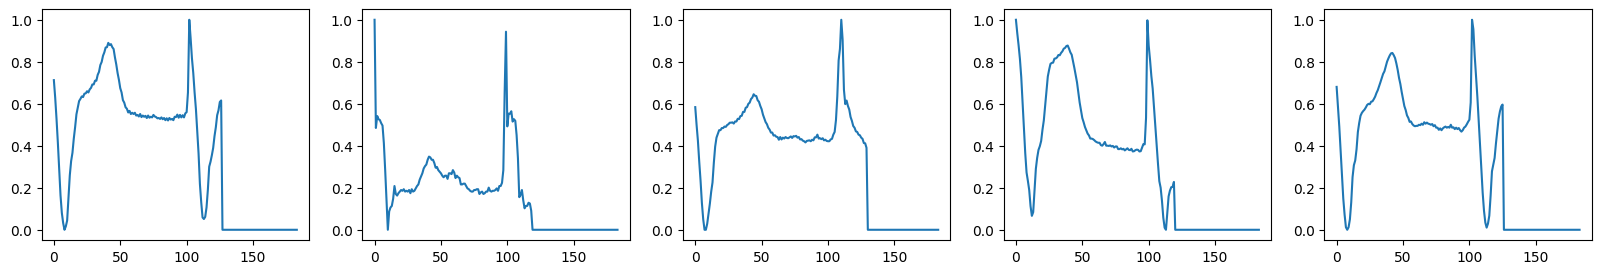

In [102]:
display(sample_data, "sample_data")

In [103]:
import numpy as np

# Assuming your original array is 'clean_ecg_signals'
# clean_ecg_signals = np.array([...])

# Get the shape of the original array
num_signals, signal_length = sample_data.shape

# Calculate the number of groups to mask (approximately 3% of the data points)
group_size_mean = (5 + 10) / 2
num_masked_groups = int(num_signals * signal_length * 0.03 / group_size_mean)

# Generate random start indices for each group
start_indices = np.random.randint(0, signal_length - 10, num_masked_groups * num_signals)

# Calculate the size of each group (5-10 timepoints)
group_sizes = np.random.randint(5, 11, num_masked_groups * num_signals)

# Create a mask numpy array with the same shape as the clean signals
mask_array = np.zeros((num_signals, signal_length), dtype=bool)

# Set the specified groups of indices to 1 (True)
for i in range(num_signals):
    for start_idx, size in zip(start_indices[i::num_signals], group_sizes[i::num_signals]):
        mask_array[i, start_idx:start_idx + size] = True


In [104]:
sample_data.shape

(10, 184)

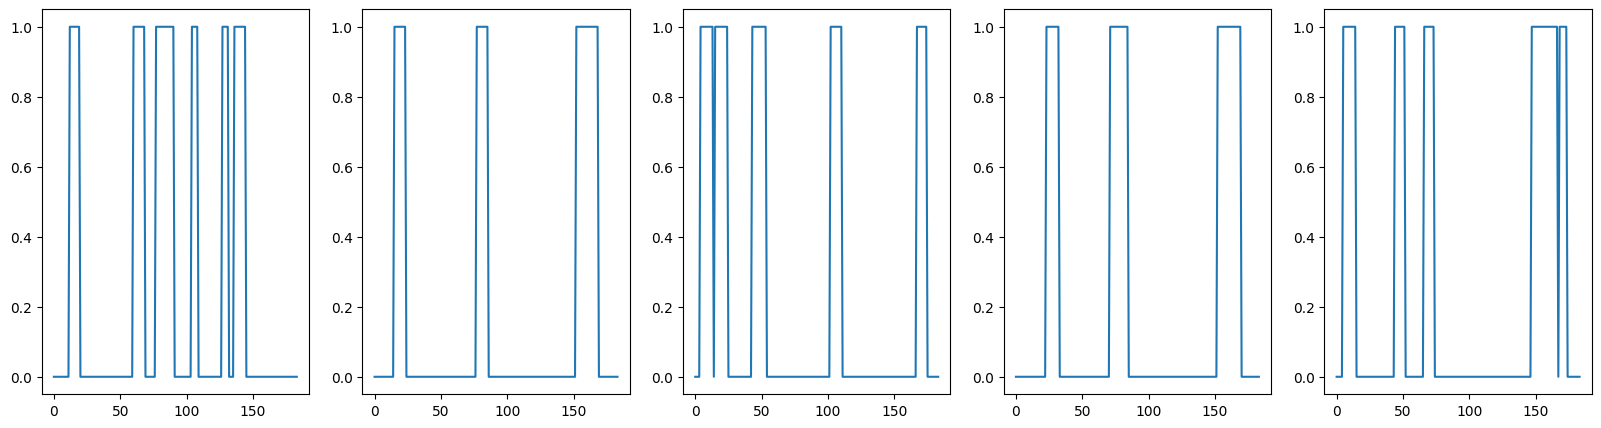

In [105]:
fig, axs = plt.subplots(1, 5, figsize=(20,5))
for i in range(5):
    axs[i].plot(mask_array[i][:])

In [106]:
masked_signals = sample_data.copy()
masked_signals[mask_array] = 0  # Or any other value you want to replace the masked data points with

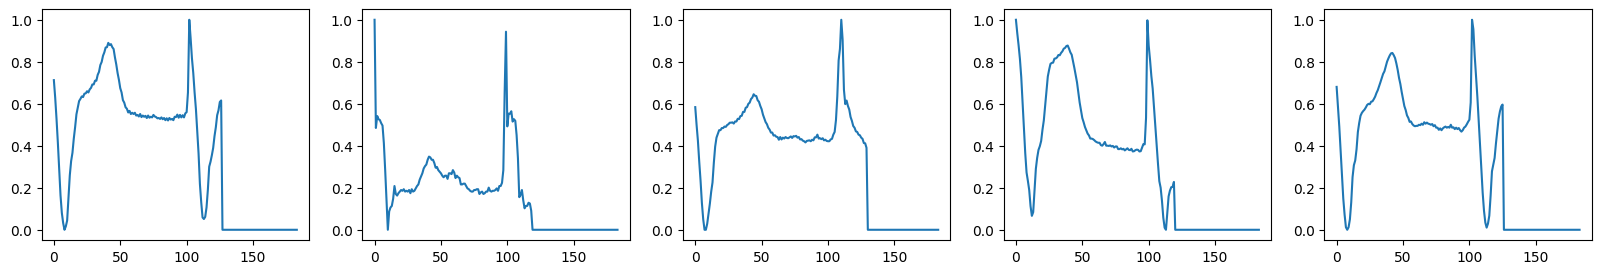

In [107]:
display(sample_data)

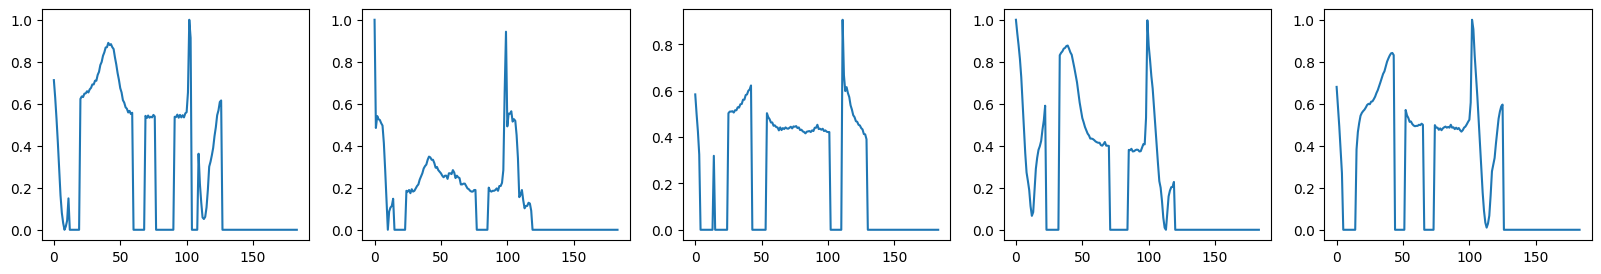

In [108]:
display(masked_signals)

In [109]:
import MITBIH
from torch.utils.data import Dataset
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import random

mask = np.full((10, 1, 128), True)
for sample in range(len(mask)):
    for ch in range(len(mask[0])):
        mask[sample][ch][:20] = False
        np.random.shuffle(mask[sample][ch])

In [111]:
mask[2][0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

In [112]:
mask = np.full((10, 1, 128), True)

In [113]:
mask[0][0][:20] = False

In [114]:
np.random.shuffle(mask[0][0])
mask[0][0]

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True]

In [115]:
from MITBIH import mitbih_masked

cond_data = mitbih_masked(filename = "../heartbeat/mitbih_train.csv")

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


In [116]:
from torch.utils import data

dataloader = data.DataLoader(cond_data, batch_size=1, num_workers=1, shuffle=True)

In [117]:
import matplotlib.pyplot as plt
org_sigs = []
cond_sigs = []

for i, data_dict in enumerate(dataloader):
    org_sigs.append(data_dict['org_data'])
    cond_sigs.append(data_dict['cond_data'])
    
    if i >= 9: 
        break

In [118]:
org_sigs[0].shape

torch.Size([1, 1, 128])

In [119]:
def pot_signals(signals):
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(1):
                axs[i, j].plot(signals[i*5+j][0][k][:])
    

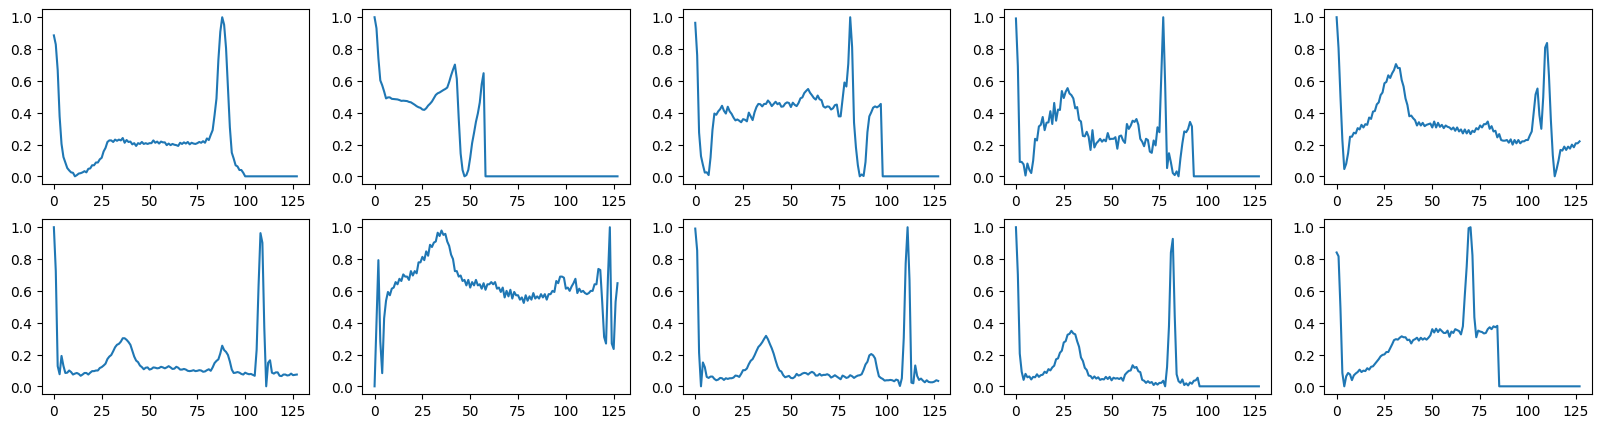

In [120]:
pot_signals(org_sigs)

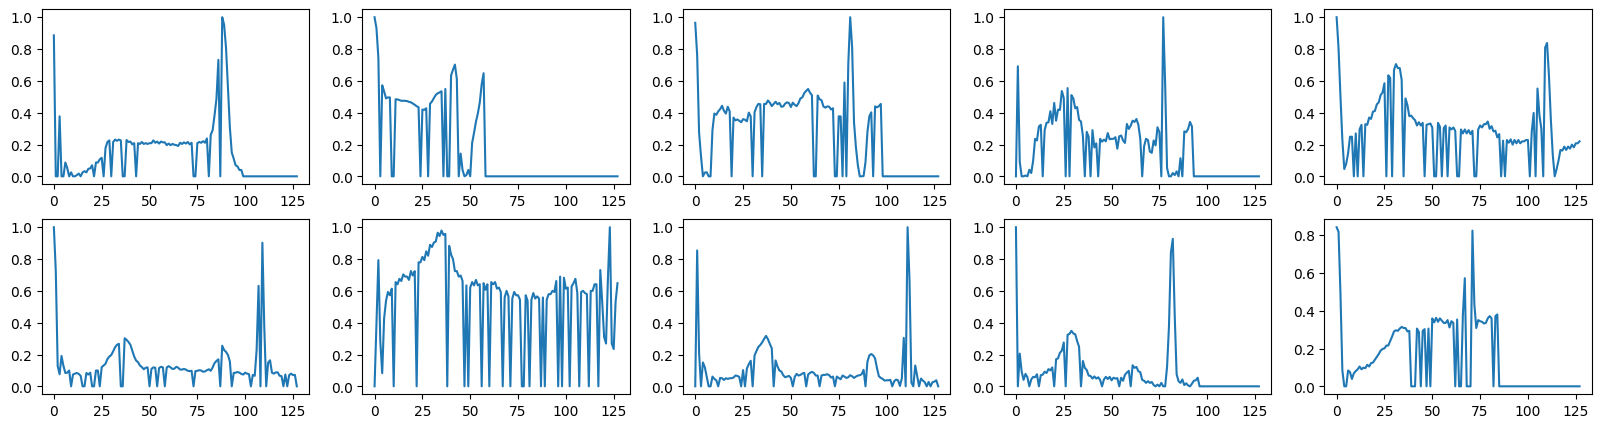

In [121]:
pot_signals(cond_sigs)

In [122]:
data_point1 = cond_data.cond_data[0]
print(data_point1.shape)

(1, 128)


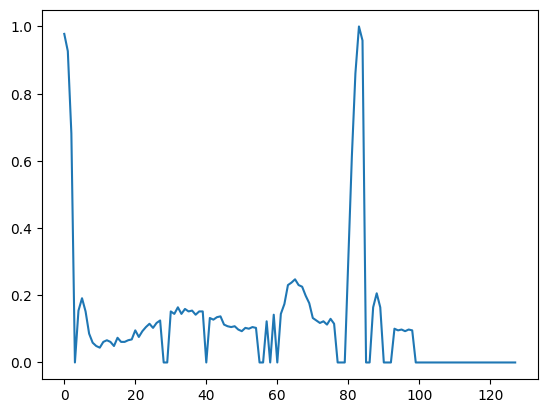

In [123]:

plt.plot(data_point1[0][:])

In [124]:

cond_mul10 = np.array([data_point1] * 10)
print(cond_mul10.shape)
cond_data = torch.from_numpy(cond_mul10)
cond_data = cond_data.to(device).to(torch.float)

(10, 1, 128)


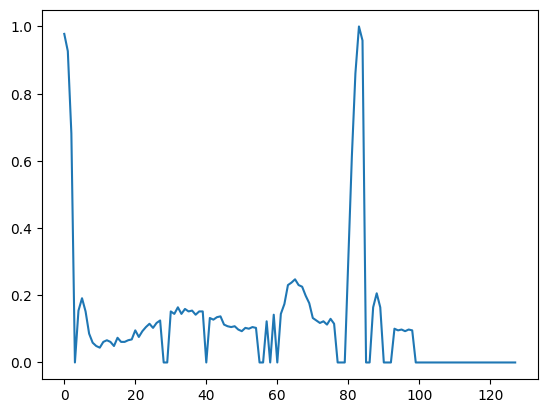

In [125]:
plt.plot(cond_mul10[1][0])
plt.show()

In [126]:
import torch
import torch.nn as nn
from modules1D_cond import Unet1D, GaussianDiffusion1D

In [127]:
device = 'cuda:2'

In [137]:
cond_data = torch.from_numpy(cond_mul10)
cond_data = cond_data.to(device).to(torch.float)

In [128]:
from MITBIH import mitbih_masked
import random
cond_ECG = mitbih_masked(filename = "../heartbeat/mitbih_train.csv", class_id = 0)
index_list = [i for i in range(len(cond_ECG))]
random.shuffle(index_list)
cond_data = torch.from_numpy(cond_ECG.cond_data[index_list][:10])
cond_data = cond_data.to(device).to(torch.float)

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


In [129]:
cond_data.shape

torch.Size([10, 1, 128])

In [138]:
model = Unet1D(
    dim = 64,
    self_condition = True,
    dim_mults = (1, 2, 4, 8),
    channels = 1)

ckpt = torch.load("./checkpoint/DDPM1D_Selfcondtional_maskedCond/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])
model = model.to(device)
# seq_length must be able to divided by dim_mults
diffusion = GaussianDiffusion1D(
    model,
    seq_length = 128,
    timesteps = 1000,
    objective = 'pred_v').to(device)

In [139]:
sampled_data = diffusion.sample(batch_size = 10, input_cond = cond_data)

sampling loop time step: 100%|██████████| 1000/1000 [00:21<00:00, 46.40it/s]


In [140]:
print(sampled_data.shape) # (sample_size, 3, 150)
sampled_data= sampled_data.to('cpu').detach().numpy()

torch.Size([10, 1, 128])


In [141]:
def plot_signals_cls_free(signals, title):
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(signals[i*5+j][0][:])
    fig.suptitle(title)
    fig.show()

In [142]:
cond_data_cpu = cond_data.to("cpu").to(torch.float)

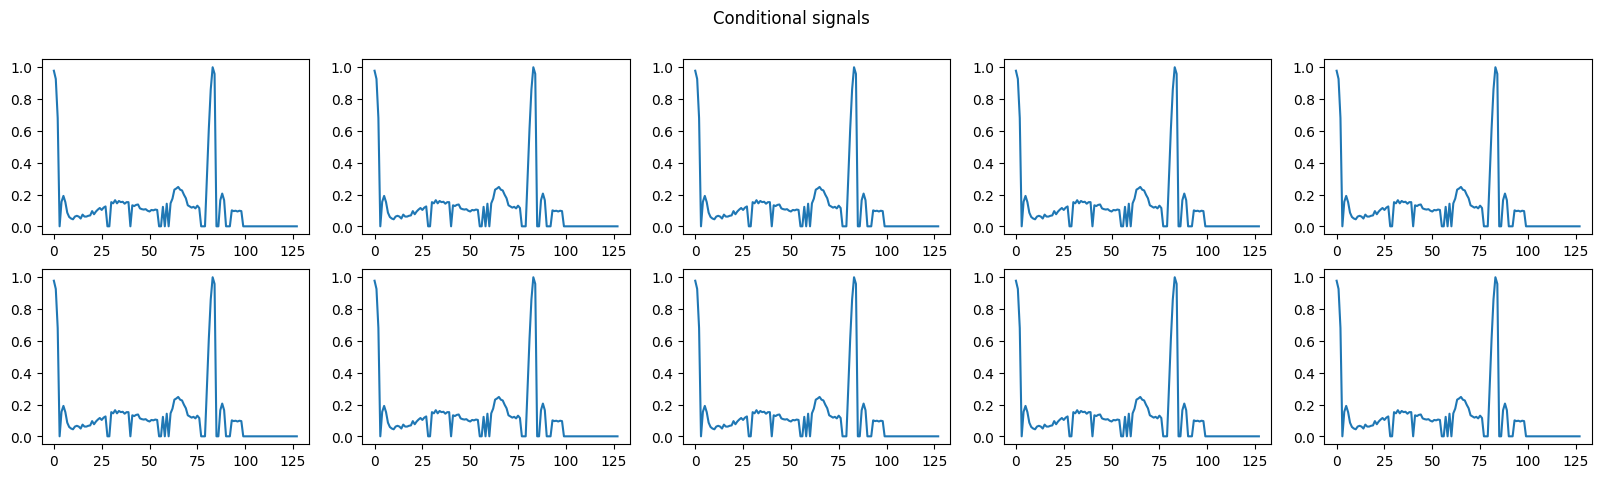

In [145]:
plot_signals_cls_free(cond_data_cpu, 'Conditional signals')

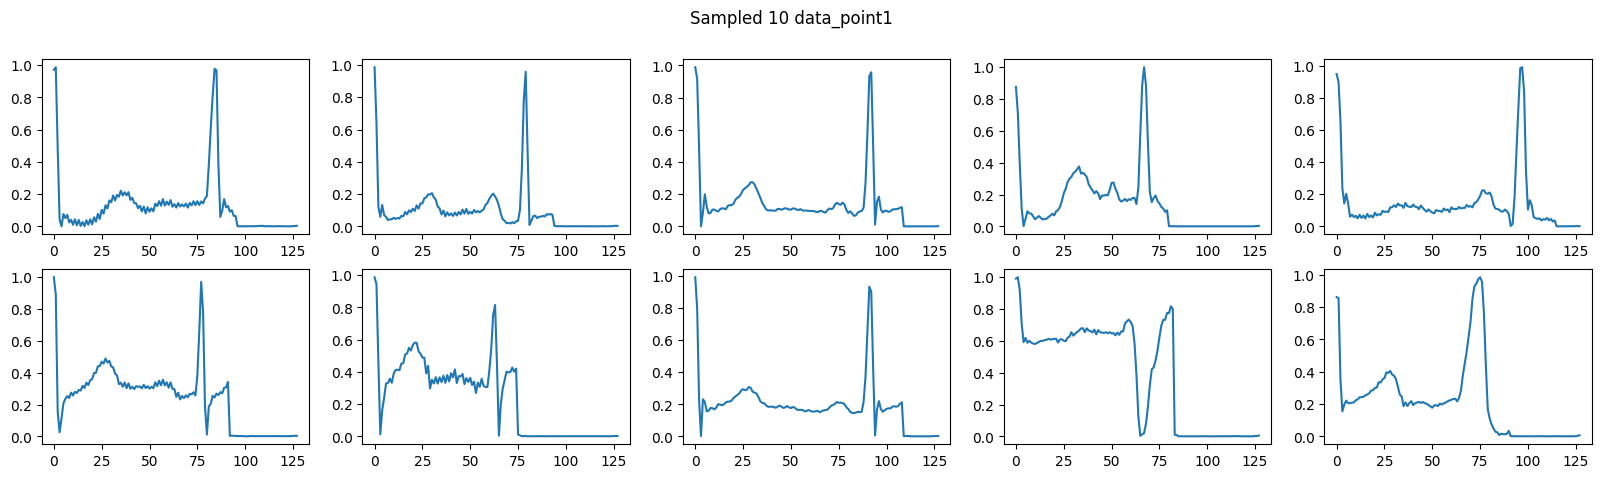

In [146]:
plot_signals_cls_free(sampled_data, 'Sampled 10 data_point1')